<a href="https://colab.research.google.com/github/Pyent/Deep-Learning-KJ/blob/master/mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [1]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import seaborn as sns
import keras

Using TensorFlow backend.


In [3]:
dataset_path = keras.utils.get_file('auto-mpg.data','http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
dataset_path

32768/30286 [================================] - 0s 4us/step


'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG','Cylinders','Displacement','HorsePowere', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path,names = column_names,na_values='?',comment = '\t',sep = ' ',skipinitialspace=True)

In [19]:
raw_dataset.shape

(398, 8)

In [6]:
raw_dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
HorsePowere     6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
raw_dataset.dropna(inplace = True)

In [13]:
raw_dataset.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c36875c0>,
      dtype=object)

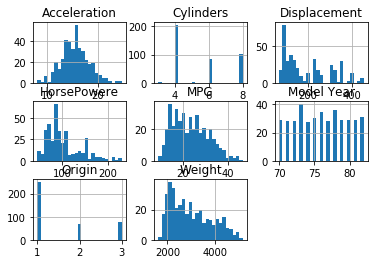

In [15]:
raw_dataset.hist(bins = 25)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(raw_dataset.drop('MPG', axis = 1),
                                                 raw_dataset[['MPG']],
                                                 test_size = 0.2,
                                                 random_state = 0)

In [54]:
X_train.shape,X_test.shape,raw_dataset.shape

((313, 7), (79, 7), (392, 8))

In [23]:
!pip install feature_engine

  Created wheel for numpydoc: filename=numpydoc-0.9.1-cp36-none-any.whl size=31872 sha256=bbfc1ad73cff8d1aac9e46a421fe86e65bc3e7ffbfdc57a7d33bc67659cf60aa
  Stored in directory: /root/.cache/pip/wheels/51/30/d1/92a39ba40f21cb70e53f8af96eb98f002a781843c065406500
Successfully built numpydoc


In [55]:
raw_dataset

,MPG,Cylinders,Displacement,HorsePowere,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [0]:
numerical_vars = [var for var in raw_dataset.columns if raw_dataset[var].nunique()>15 and var not in ['MPG',]]

In [57]:
numerical_vars

['Displacement', 'HorsePowere', 'Weight', 'Acceleration']

In [0]:
categorical_vars = [var for var in raw_dataset.columns if raw_dataset[var].nunique()<15 and var not in ['MPG']
                    ]

In [40]:
for var in categorical_vars:
  print(var, raw_dataset[var].unique())

Cylinders [8 4 6 3 5]
Model Year [70 71 72 73 74 75 76 77 78 79 80 81 82]
Origin [1 3 2]


In [0]:
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
mpg_pipe = Pipeline([
            
          ('rfc', RandomForestRegressor())

])

In [66]:
mpg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('rfc',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [0]:
X_test_preds = mpg_pipe.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, X_test_preds)
mse


6.139101265822784

In [71]:
from math import sqrt
sqrt(mse)

2.4777209822380697

In [72]:
raw_dataset['MPG'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [0]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test,X_test_preds)

0.9012296650688101

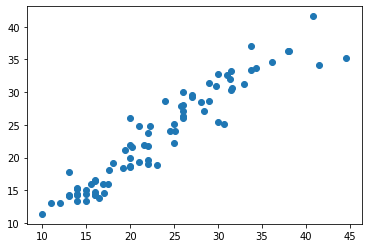

In [76]:
import matplotlib.pyplot as plt
plt.scatter(y_test, X_test_preds)

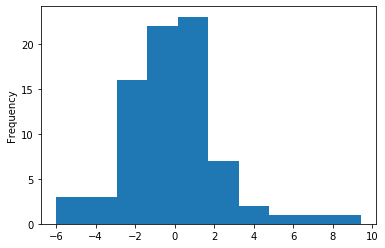

In [88]:
e = y_test['MPG'] - X_test_preds
e.plot.hist()